In [ ]:
import pandas as pd
import numpy as np
import processing_functions as pf
import matplotlib.pyplot as plt

In [1]:
df = pd.read_pickle('../../Data/Raw Datasets/food_full.pkl')
df.head()

NameError: name 'pd' is not defined

In [ ]:
current_count = pf.counting(data_list = df['ingredients'], to_count="")
current_count

Counter({'salt': 364164,
         'eggs': 333939,
         'tsp salt': 260887,
         'c sugar': 245022,
         'teaspoon salt': 240383,
         'butter': 206049,
         'sugar': 176361,
         'water': 143028,
         'onion': 138127,
         'egg': 135707,
         'olive oil': 132838,
         'tsp vanilla': 127328,
         'c flour': 126317,
         'c milk': 111533,
         'garlic cloves': 109932,
         'pepper': 103049,
         'cup sugar': 98631,
         'milk': 96124,
         'flour': 95412,
         'c water': 82444,
         'all-purpose flour': 70577,
         'garlic': 70182,
         'tsp baking powder': 68563,
         'brown sugar': 65348,
         'cup water': 62011,
         'baking powder': 61120,
         'tsp pepper': 56204,
         'lemon juice': 56197,
         'tsp cinnamon': 54918,
         'tablespoons olive oil': 54420,
         'black pepper': 52711,
         'onions': 52589,
         'cup milk': 51397,
         'teaspoon pepper': 51353,

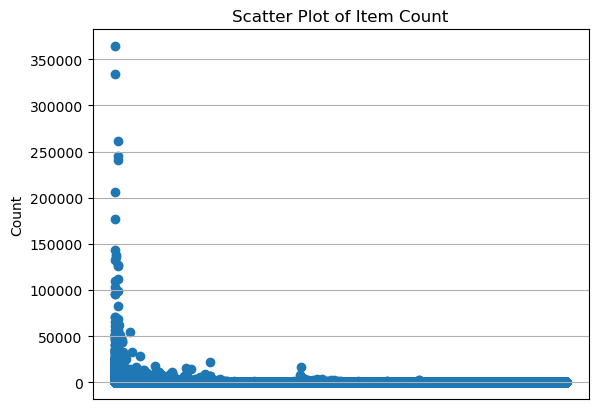

In [ ]:
items = list(current_count.keys())
counts = list(current_count.values())
order = list(range(1, len(items) + 1))  # Create a list representing the order

plt.scatter(order, counts)
plt.ylabel('Count')
plt.title('Scatter Plot of Item Count')
plt.xticks([])
plt.grid(True)
plt.show()

### We can see a large amount of words that are unneccesary to our goal
- will create a list (large) through study of the dataset of words to remove
- we also don't need words like "flour" and "salt" to offset the predictions, nobody wants to hear "You know what goes really well with chicken? Flour!"

In [ ]:
words_to_drop = {
    '°', '&', '1%', '2%', 'a', 'about', 'accent', 'according', 'active', 'add', 'added',
    'additional', 'all', 'all-purpose', 'allpurpose', 'also', 'amount', 'amp', 'and', 'another',
    'any', 'approx', 'approximately', 'artificial', 'as', 'at', 'available', 'bag', 'bags',
    'bakers', 'baking', 'baking soda', 'bar', 'basic', 'beaten', 'beaters', 'best', 'better', 'bicarbonate',
    'big', 'bite', 'bitesize', 'bitesized', 'bits', 'black pepper', 'blanched', 'blend', 'block', 'boiled',
    'boiling', 'bone', 'boned', 'boneless', 'bouillon', 'bottle', 'bottled', 'bottles', 'bottom', 'box',
    'boxes', 'brand', 'breakstones', 'brewed', 'broiler-fryer', 'broth', 'broken', 'brown', 'brushing', 'bsp',
    'bulk', 'bulb', 'bunch', 'bunches', 'butter', 'buttered', 'buy', 'c', 'cake', 'called', 'can', 'canned',
    'cans', 'caster', 'carton', 'center', 'chilled', 'chip', 'choice', 'chopped', 'chunk', 'chunks', 'clean',
    'cleaned', 'clear', 'club', 'cm', 'coarsely', 'coarse', 'coating', 'cocktail', 'colby', 'cold',
    'colored', 'coloring', 'concentrate', 'condensed', 'confectioners', "confectioners'", 'container', 'cooked', 'cooking', 'cooled',
    'cored', 'cornflour', 'cornstarch', 'count', 'country', 'cover', 'cracker', 'crisco', 'crisp', 'crumbled', 'crumb', 'crumbles',
    'crust', 'crunchy', 'crushed', 'crystallized', 'ct', 'cube', 'cubed', 'cubes', 'cup', 'cups', 'cut', 'dairy', 'dash', 
    'dashes', 'day', 'dayold', 'de', 'deboned', 'defrosted', 'depending', 'desired', 'desseded', 'deveined', 'devil', 
    'diagonal', 'diagonally', 'diameter', 'dice', 'diced', 'diet', 'dinner', 'dip', 'discarded', 'dish', 'dissolved', 
    'divided', 'dont', 'dough', 'doz', 'dozen', 'drain', 'drained', 'dream', 'dried', 'dripping', 'drizzle', 'drizzling', 
    'drops', 'dry', 'dusting', 'ea', 'each', 'eagle', 'ears', 'either', 'ends', 'enough', 'envelope', 'equal', 'equipment', 
    'equivalent', 'etc', 'evoo', 'exess', 'extract', 'extra', 'extra-virgin', 'extravirgin', 'f', 'farm', 'fat', 'fatfree', 
    'favorite', 'filling', 'fine', 'find', 'finely', 'firm', 'firmly', 'fl', 'flakes', 'flat', 'flat-leaf', 'flatleaf', 
    'flavoring', 'flavored', 'float', 'floret', 'floweret', 'flour', 'foil', 'food', 'foods', 'for', 'found', 'four', 'free', 
    'frenchstyle', 'fresh', 'freshly', 'fried', 'frosting', 'frozen', 'frzn', 'fry', 'fryer', 'frying', 'full', 'fully', 'g', 
    'gal', 'gallon', 'gallons', 'garlic', 'garlic cloves', 'garnish', 'gelatin', 'generous', 'get', 'gluten', 'gm', 
    'goodquality', 'granular', 'granulated', 'grated', 'great', 'grease', 'greasing', 'grill', 'grilled', 'grnd', 'grm', 
    'ground', 'halved', 'halves', 'handful', 'harcooked', 'hard', 'hard-boiled', 'hardboiled','hardcooked', 'head', 'healthy', 'heat', 
    'heated', 'heaping', 'hellmanns', 'hidden', 'homemade', 'hot', 'hulled', 'i', 'ice', 'if', 'in', 'inch', 'inches', 
    'inchthick', 'including', 'ingredient', 'ingredients', 'instant', 'into', 'jar', 'jarred', 'jars', 'juiced', 'julienne', 
    'julienned', 'k', 'kernels', 'key', 'kg', 'kind', 'kitchen', 'knudsen', 'kosher', 'kraft', 'l', 'large', 'layer', 'lb', 
    'lbs', 'lean', 'leaf', 'leaves', 'least', 'leftover', 'lengthwise', 'lengths', 'less', 'lesssodium', 'level', 'lg', 'lightly', 
    'like', 'lipton', 'liter', 'liters', 'little', 'loosely', 'low', 'low-fat', 'lowfat', 'lowsodium', 'lrg', 'lukewarm', 'lump', 
    'made', 'make', 'makes', 'margarine', 'mashed', 'meal', 'med', 'medium', 'mediumsize', 'mediumsized', 'melted', 'mg', 'mild', 
    'milligram', 'milligrams', 'milliliter', 'milliliters', 'minced', 'mini', 'miniature', 'minute', 'minutes', 'mix', 'ml', 
    'mms', 'more', 'mrs', 'much', 'n', 'necessary', 'need', 'needed', 'new', 'no', 'nonfat', 'none', 'nonstick', 'not', 'note', 
    'notes', 'nutritional', 'o', 'of', 'oil', 'on', 'one', 'ones', 'optional', 'or', 'organic', 'ounce', 'ounces', 'oven', 
    'overnight', 'oz', 'oz.', 'pack', 'package', 'packages', 'packed', 'packet', 'packets', 'page', 'pan', 'partially', 'part-skim', 
    'parts', 'paste', 'patted', 'pcs', 'peel', 'peeled', 'per', 'pet', 'philadelphia', 'pie', 'piece', 'pieces', 'pinch', 'pint', 
    'pints', 'pitted', 'pizza', 'pkg', 'pkt', 'plain', 'plus', 'popped', 'possibly', 'pot', 'pound', 'pounds', 'powder', 'powdered', 
    'precooked', 'prefer', 'preferably', 'preference', 'prepared', 'preserves', 'pressed', 'process', 'processed', 'processor', 
    'product', 'pt', 'pure', 'pureed', 'purpose', 'pwdr', 'qt', 'quart', 'quartered', 'quarters', 'quarts', 'quick', 'quick-cooking', 'raising',
    'raw', 'rising', 'real', 'ready', 'recommended', 'reduced', 'reduced-fat', 'reducedsodium', 'refrigerated', 'regular', 'remove', 'reserved', 
    'rind','rinsed', 'ripe', 'roasting', 'roll', 'rolled', 'room', 'rotel', 'rough', 'roughly', 'rounded', 'rounds', 'rubbed', 'safeway', 
    'salad', 'salt', 'salted', 'san', 'sanwich', 'sauce', 'save', 'scalded', 'scant','scraped', 'scrubbed', 'sea', 'season', 'seasoned', 
    'seasoning', 'seasons', 'sec', 'sections', 'see', 'seeded', 'self-raising', 'self', 'selfrising','self-rising', 'seperated', 'separated', 
    'serving', 'several', 'shaved', 'sheet', 'sheets', 'shell', 'shelled', 'shortening', 'shredded', 'shucked', 'side', 'sifted', 'simple', 'size', 'sized', 
    'skinless', 'skinned', 'slice', 'sliced', 'slices', 'slightly', 'slivered', 'sm', 'small', 'smashed', 'snipped', 'soaked', 'soft', 
    'softened', 'softend', 'soda', 'sodium', 'solid', 'soup', 'spear','splash', 'spray', 'sprig', 'sprigs', 'sprinkle', 
    'sprinkling', 'sq', 'square', 'squares', 'squeezed', 'stalk', 'stalks', 'steamed', 'stem', 'stem', 'stemmed', 'stewing', 'stevia', 
    'stick', 'sticks', 'storebought', 'stove', 'strained', 'string', 'strip', 'strips', 'stuffed', 'sub', 'substitute', 'substituted', 
    'sugar', 'superfine', 'sweetener', 't', 'tablespoon', 'tablespoons', 'taste', 'tb', 'tbl', 'tbls', 'tbs', 'tbsp', 'teaspoon', 'teaspoons', 
    'temp', 'temperature', 'thawed', 'thick', 'thickly', 'thin', 'thinly', 'thread', 'three', 'thru', 'tidbit', 'time', 'tiny', 'tips', 
    'to', 'toasted', 'together', 'tomato', 'tomatoes', 'toppings', 'torn', 'tops', 'total', 'tots', 'trimmed', 'triple', 'tsp', 'tub', 'two', 
    'type', 'unbaked', 'unbeaten', 'uncle', 'uncooked', 'undiluted', 'undrained', 'unflavored', 'unpeeled', 'unsalted', 'unsifted', 
    'up', 'use', 'used', 'using', 'usually', 'v', 'variety', 'vegetable', 'virgin', 'want', 'warm', 'warmed', 'washed', 'water', 'wedge', 
    'weight', 'well', 'whatever', 'whipping', 'white', 'whites', 'whole', 'wide', 'with', 'without', 'wooden', 'work', 'would', 'x', 
    'yeast', 'yolk', 'yolks', 'you', 'your', 'zest', 'zested','topping', 'unbleached', 'flavor', 'quickcooking', 'pastry', 'glaze', 
    'light', 'turbinado','sweet', 'cool', 'table', 'dark', 'whip', 'splenda', 'skewer', 'savory', 'scant', 'semolina', 'cornmeal', 
    'the', 'unsweetened', 'reducedfat','envelopes','pinches', 'valley','cane', 'vegall', 'partskim', 'starch', 'granules', 'starch',
     'dog', 'light','lard', 'oldfashioned', 'old','fashioned','reduced-sodium', 'skim', 'evaporated', 'oleo', 'heavy', 'flaked',
}

In [ ]:
len(words_to_drop)

691

In [ ]:
df['clean_ingredients'] = df['ingredients'].apply(lambda x: pf.remove_words(x, words_to_drop))
df.head()


,id,ingredients,clean_ingredients
0,10259,"[romaine lettuce, black olives, grape tomatoes...","[romaine lettuce, black olives, grape, pepper,..."
1,25693,"[plain flour, ground pepper, salt, tomatoes, g...","[pepper, black pepper, thyme, eggs, green, yel..."
2,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[eggs, pepper, mayonaise, green chilies, chick..."
3,22213,"[water, vegetable oil, wheat, salt]",[wheat]
4,13162,"[black pepper, shallots, cornflour, cayenne pe...","[black pepper, shallots, cayenne pepper, onion..."


### Lots of words ending in "s" will reduce visibility
 - I don't need "eggs" in one spot and "egg" in another

In [ ]:
df['clean_ingredients'] = df['clean_ingredients'].apply(lambda x: pf.remove_plural_s(x, letters_to_replace="s", replace_with=""))
current_count = pf.counting(df['clean_ingredients'], "s")
current_count

Counter({'cloves': 360148,
         'potatoes': 118086,
         'bananas': 43233,
         'strawberries': 42906,
         'chives': 36752,
         'apples': 34524,
         'green chilies': 29109,
         'cranberries': 27124,
         'peas': 25661,
         'molasses': 25098,
         'blueberries': 24924,
         'tortillas': 24318,
         'black olives': 23357,
         'dates': 17026,
         'raspberries': 15467,
         'asparagus': 14876,
         'olives': 14410,
         'corn tortillas': 13975,
         'peaches': 13933,
         'mandarin oranges': 11936,
         'chickpeas': 11277,
         'cherries': 11270,
         'avocados': 10312,
         'red potatoes': 10147,
         'egg noodles': 9303,
         'noodles': 8573,
         'maraschino cherries': 8480,
         'russet potatoes': 7855,
         'green olives': 7621,
         'oranges': 7550,
         'limes': 6683,
         'granny smith apples': 6651,
         'mixed vegetables': 6634,
         'green pe

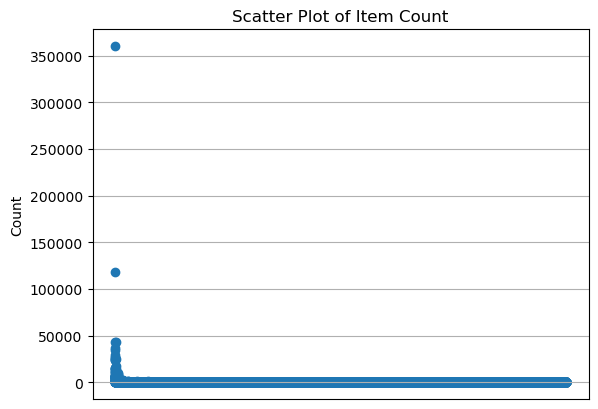

In [ ]:
items = list(current_count.keys())
counts = list(current_count.values())
order = list(range(1, len(items) + 1))  # Create a list representing the order

plt.scatter(order, counts)
plt.ylabel('Count')
plt.title('Scatter Plot of Item Count')
plt.xticks([])
plt.grid(True)
plt.show()

### We still have other plurals
 - lets convert "ies" to "y" 
 - lets convert "oes" to "o"

In [ ]:
df['clean_ingredients'] = df['clean_ingredients'].apply(lambda x: pf.remove_plural_s(x, letters_to_replace="ies", replace_with="y"))
df.head()

,id,ingredients,clean_ingredients
0,10259,"[romaine lettuce, black olives, grape tomatoes...","[romaine lettuce, black olives, grape, pepper,..."
1,25693,"[plain flour, ground pepper, salt, tomatoes, g...","[pepper, black pepper, thyme, egg, green, yell..."
2,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[egg, pepper, mayonaise, green chily, chicken ..."
3,22213,"[water, vegetable oil, wheat, salt]",[wheat]
4,13162,"[black pepper, shallots, cornflour, cayenne pe...","[black pepper, shallot, cayenne pepper, onion,..."


In [ ]:
pf.counting(df['clean_ingredients'], "ies")


Counter()

In [ ]:
df['clean_ingredients'] = df['clean_ingredients'].apply(lambda x: pf.remove_plural_s(x, letters_to_replace="oes", replace_with="o"))
df.head()

,id,ingredients,clean_ingredients
0,10259,"[romaine lettuce, black olives, grape tomatoes...","[romaine lettuce, black olives, grape, pepper,..."
1,25693,"[plain flour, ground pepper, salt, tomatoes, g...","[pepper, black pepper, thyme, egg, green, yell..."
2,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[egg, pepper, mayonaise, green chily, chicken ..."
3,22213,"[water, vegetable oil, wheat, salt]",[wheat]
4,13162,"[black pepper, shallots, cornflour, cayenne pe...","[black pepper, shallot, cayenne pepper, onion,..."


In [ ]:
pf.counting(df['clean_ingredients'], "oes")

Counter()

In [ ]:
current_count = pf.counting(data_list = df['clean_ingredients'], to_count="")
current_count

Counter({'egg': 867331,
         'onion': 722090,
         'pepper': 516171,
         'olive': 453239,
         'milk': 445985,
         'vanilla': 401207,
         'cloves': 360148,
         'black pepper': 299971,
         'cinnamon': 262941,
         'lemon juice': 232163,
         'parsley': 213475,
         'chicken': 198769,
         'sour cream': 172506,
         'cream cheese': 164553,
         'carrot': 159845,
         'celery': 154065,
         'beef': 152579,
         'parmesan cheese': 146794,
         'potato': 143106,
         'clove': 138563,
         'ginger': 133501,
         'basil': 123811,
         'cheddar cheese': 122405,
         'green onion': 122170,
         'lemon': 122022,
         'soy': 121030,
         'chicken breast': 118477,
         'mayonnaise': 118141,
         'oregano': 112369,
         'pecan': 112076,
         'nutmeg': 110999,
         'thyme': 107870,
         'cilantro': 105160,
         'mushroom': 105069,
         'honey': 102556,
        

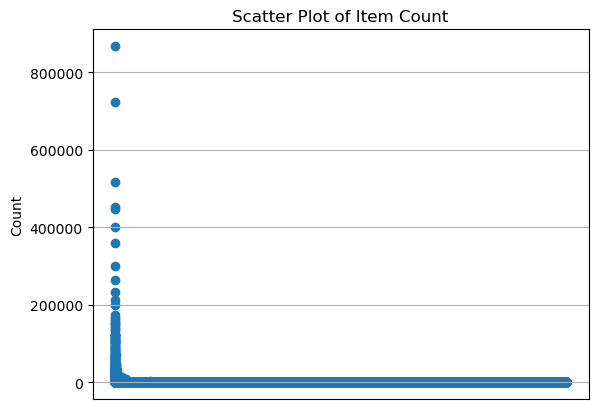

In [ ]:
items = list(current_count.keys())
counts = list(current_count.values())
order = list(range(1, len(items) + 1))  # Create a list representing the order

plt.scatter(order, counts)
plt.ylabel('Count')
plt.title('Scatter Plot of Item Count')
plt.xticks([])
plt.grid(True)
plt.show()

In [ ]:
words_to_replace = {
    'apple': ['apples'],
    'half-and-half cream': ['halfandhalf', 'half half', 'half-and-half', 'halfandhalf cream'],
    'light sour cream': ['lowfat sour cream'],
    'marshmallow cream': ['marshmallow creme'],
    'egg': ['egg egg', 'eggs egg'],
    'ginger root': ['gingerroot'],
    'long grain rice': ['long-grain rice', 'longgrain rice'],
    'avocado': ['avocados'],
    'jalapeno': ['jalapenos', 'jalapeno chily', 'jalapeno pepper'],
    'kalamata olive': ['kalamata olives'],
    'granny smith apple': ['granny smith apples'],
    'banana': ['bananas'],
    'basil': ['basil basil'],
    'cheddar cheese': ['cheddar', 'sharp cheddar', 'sharp cheddar cheese', 'sharp cheese'],
    'beef chuck': ['beef chuck roast','chuck','chuck roast'],
    'cool whip': ['cool whip whipped topping'],
    'dill pickle': ['dill pickles'],
    'velveeta cheese': ['velveeta'],
    'vanilla': ['vanilla bean', 'vanilla bean split', 'vanilla cream', 'vanilla essence'],
    'thyme': ['thyme thyme'],
    'sunflower seed': ['sunflower'],
    'sun-dried tomato': [ 'sun-dried', 'sundried', 'sundried tomato'],
    'soy': ['soya'],
    'kiwi fruit': ['kiwi'],
    'lemon juice': ['lemon juice lemon','juice lemon', 'lemon, juice'],
    'lemon': ['lemon,','lemon wedges'],
    'lime juice': ['lime, juice', 'juice lime'],
    'mayonnaise': ['mayo', 'mayonaise',"mayo mayonnaise"],
    'mozzarella cheese': ['mozarella', 'mozzarella','mozarella cheese'],
    'monterey jack cheese': ['monterey jack pepper cheese'],
    'olives': ['olive'],
    'onion': ['onion onion'],
    'orange': ['oranges'],
    'panko breadcrumb': ['panko bread crumb'],
    'parmigiano-reggiano cheese': [ 'parmigianoreggiano', 'parmigianoreggiano cheese'],
    'penne pasta': ['penne'],
    'pimiento': ['pimento', 'pimentos', 'pimientos'],
    'pistachios': ['pistachio nut'],
    'oatmeal': ['oat'],
    'mascarpone cheese': ['mascarpone'],
    'radish': ['radishes'],
    'chili pepper': ['chilli','chily', 'chili bean', 'chili', 'chile'],
    'red chili': [ 'red chile', 'red chili pepper', 'red chily'],
    'ricotta': ['ricotta cheese'],
    'saffron': ['saffron thread'],
    'semi-sweet chocolate':['semi-sweet chocolate chip', 'semisweet chocolate', 'semisweet chocolate chip', 'semisweet chocolate morsel'],
    'sirloin steak':['sirloin'],
    'black pepper': ['pepper', 'cracked black pepper', 'cracked pepper'],
    'yogurt': ['yoghurt'],
    'sesame seed': ['sesame'],
    '':['deep','golden','green','icing','liquid','puff', 'lite','marinade','miracle','miracle dressing', 'angel','land lakes', 'roasted', 'round', 'yellow', 'roasted', 'round','degrees','xanthan gum', 'wheat germ','pickling','taco','puree','bean', 'distilled vinegar'], # will drop these list items altogether
    'cloves': ['clove'],
    'feta cheese': ['feta'],
    'green chili pepper': ['green chili','green chiles','green chily',],
    
}

In [ ]:
def replace_ingredients_reversed(ingredients_list, replacement_dict):
    """
    Replaces ingredients in a list based on a reversed dictionary.

    Args:
        ingredients_list (list): List of ingredients to process.
        replacement_dict (dict): Dictionary where keys are the desired words,
                                 and values are lists of variations to replace.

    Returns:
        list: List with replacements made.
    """

    replaced_list = []
    for ingredient in ingredients_list:
        replaced = False  # Flag to track if a replacement occurred
        for desired_word, variations in replacement_dict.items():
            if ingredient in variations:
                if desired_word == '':
                    replaced = True
                    break
                replaced_list.append(desired_word)
                replaced = True
                break  # Stop checking other desired words
        if not replaced:
            replaced_list.append(ingredient)  # Keep original if no replacement
    return replaced_list

In [ ]:
df['clean_ingredients'] = df['clean_ingredients'].apply(lambda x: replace_ingredients_reversed(x, words_to_replace))

In [ ]:
df.shape

(3053953, 3)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(3053953, 3)

In [ ]:
current_count = pf.counting(data_list = df['clean_ingredients'], to_count="")
current_count

Counter({'egg': 874051,
         'black pepper': 829872,
         'onion': 724084,
         'cloves': 498711,
         'olives': 467649,
         'milk': 445985,
         'vanilla': 425312,
         'cinnamon': 262941,
         'lemon juice': 250270,
         'parsley': 213475,
         'chicken': 198769,
         'sour cream': 172506,
         'cream cheese': 164553,
         'cheddar cheese': 164118,
         'carrot': 159845,
         'celery': 154065,
         'beef': 152579,
         'parmesan cheese': 146794,
         'potato': 143106,
         'ginger': 133501,
         'lemon': 130946,
         'basil': 125883,
         'mayonnaise': 125754,
         'soy': 123412,
         'green onion': 122170,
         'chicken breast': 118477,
         'chili pepper': 118171,
         'oregano': 112369,
         'pecan': 112076,
         'nutmeg': 110999,
         'thyme': 109916,
         'cilantro': 105160,
         'mushroom': 105069,
         'honey': 102556,
         'red pepper': 1021

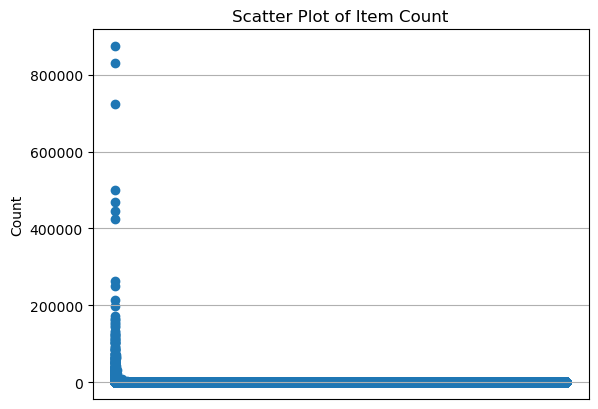

In [ ]:
items = list(current_count.keys())
counts = list(current_count.values())
order = list(range(1, len(items) + 1))  # Create a list representing the order

plt.scatter(order, counts)
plt.ylabel('Count')
plt.title('Scatter Plot of Item Count')
plt.xticks([])
plt.grid(True)
plt.show()

In [ ]:
num_to_drop = 1500
filtered_counter = {item for item, count in current_count.items() if count <= num_to_drop}
filtered_counter

{'halibut whitefish fillet',
 'avocado toast poached egg',
 'very green ion',
 'halo top vanilla bean',
 'feta cheese crumble wanted',
 'egg noodles singaporestyle',
 'master chipotle roasted',
 'tones chili',
 'green chili vertically',
 'bass fish really',
 'vanilla cremefilled vanilla sandwich cooky',
 'cauliflower break flowerett',
 'fluid butterscotch shnapp',
 'nilla wafers reserve wafer',
 'tiramisu novarino',
 'onion red vidalia wonderful yellow good',
 'pickle relish sieve',
 'rum witch hazel vodka',
 'glycerite',
 'cherry tomatoesyellow red',
 'juices poultry stock',
 'tang crystal',
 'potato chips corn chips cracker',
 'corn starchcornflour this ensures',
 'green onions fancy',
 'shrimp tail shells left intact',
 'firmripe redskinned plum',
 'assorted celery onion green onion mushrooms brocolli bell pepper',
 'whipped cream andor fruit',
 'loaf bread portion',
 'berry buckle batter',
 'heath skor bars course',
 'mixed arugula baby spinach baby red chard',
 'maui world harbors

In [ ]:
df['clean_ingredients'] = df['clean_ingredients'].apply(lambda x: pf.remove_list_items(x, filtered_counter))
df.head()

,id,ingredients,clean_ingredients
0,10259,"[romaine lettuce, black olives, grape tomatoes...","[romaine lettuce, black olives, grape, black p..."
1,25693,"[plain flour, ground pepper, salt, tomatoes, g...","[black pepper, black pepper, thyme, egg, yello..."
2,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[egg, black pepper, mayonnaise, green chili pe..."
3,22213,"[water, vegetable oil, wheat, salt]",[wheat]
4,13162,"[black pepper, shallots, cornflour, cayenne pe...","[black pepper, shallot, cayenne pepper, onion,..."


In [ ]:
current_count = pf.counting(data_list = df['clean_ingredients'], to_count="")
current_count

Counter({'egg': 874051,
         'black pepper': 829872,
         'onion': 724084,
         'cloves': 498711,
         'olives': 467649,
         'milk': 445985,
         'vanilla': 425312,
         'cinnamon': 262941,
         'lemon juice': 250270,
         'parsley': 213475,
         'chicken': 198769,
         'sour cream': 172506,
         'cream cheese': 164553,
         'cheddar cheese': 164118,
         'carrot': 159845,
         'celery': 154065,
         'beef': 152579,
         'parmesan cheese': 146794,
         'potato': 143106,
         'ginger': 133501,
         'lemon': 130946,
         'basil': 125883,
         'mayonnaise': 125754,
         'soy': 123412,
         'green onion': 122170,
         'chicken breast': 118477,
         'chili pepper': 118171,
         'oregano': 112369,
         'pecan': 112076,
         'nutmeg': 110999,
         'thyme': 109916,
         'cilantro': 105160,
         'mushroom': 105069,
         'honey': 102556,
         'red pepper': 1021

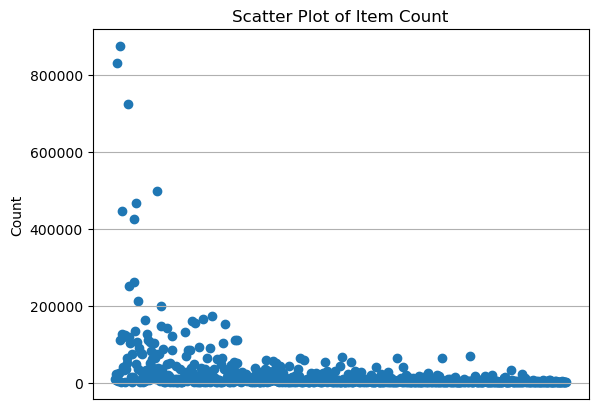

In [ ]:
items = list(current_count.keys())
counts = list(current_count.values())
order = list(range(1, len(items) + 1))  # Create a list representing the order

plt.scatter(order, counts)
plt.ylabel('Count')
plt.title('Scatter Plot of Item Count')
plt.xticks([])
plt.grid(True)
plt.show()

- We now have a bunch of rows with single item lists, these are going to be pretty useless and will just add processing time later so we will drop the,

In [ ]:
df = df[df['clean_ingredients'].apply(lambda x: not len(x) == 1)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2897241 entries, 0 to 2231141
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   id                 int64 
 1   ingredients        object
 2   clean_ingredients  object
dtypes: int64(1), object(2)
memory usage: 88.4+ MB


In [ ]:
current_count = pf.counting(data_list = df['clean_ingredients'], to_count="")
current_count

Counter({'egg': 857108,
         'black pepper': 825785,
         'onion': 722194,
         'cloves': 497765,
         'olives': 464524,
         'milk': 433891,
         'vanilla': 419822,
         'cinnamon': 259889,
         'lemon juice': 247035,
         'parsley': 213109,
         'chicken': 197893,
         'sour cream': 171336,
         'cheddar cheese': 163175,
         'cream cheese': 161694,
         'carrot': 159430,
         'celery': 153937,
         'beef': 152002,
         'parmesan cheese': 146001,
         'potato': 141232,
         'ginger': 133015,
         'lemon': 129172,
         'basil': 125560,
         'mayonnaise': 125311,
         'soy': 122820,
         'green onion': 121905,
         'chili pepper': 117748,
         'chicken breast': 117520,
         'oregano': 112251,
         'nutmeg': 110761,
         'pecan': 110336,
         'thyme': 109789,
         'cilantro': 104975,
         'mushroom': 104772,
         'cumin': 102023,
         'red pepper': 1019

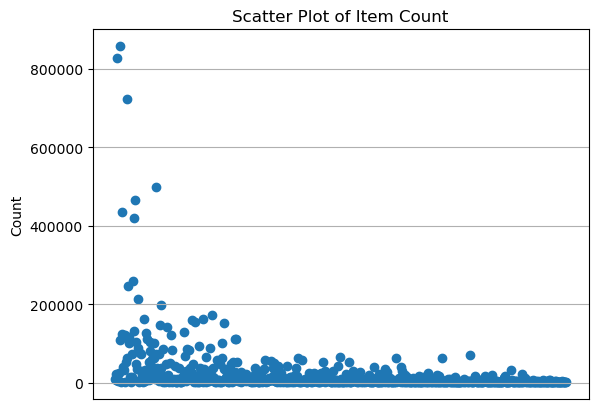

In [ ]:
items = list(current_count.keys())
counts = list(current_count.values())
order = list(range(1, len(items) + 1))  # Create a list representing the order

plt.scatter(order, counts)
plt.ylabel('Count')
plt.title('Scatter Plot of Item Count')
plt.xticks([])
plt.grid(True)
plt.show()

In [ ]:
df['clean_ingredients'] = df['clean_ingredients'].apply(lambda x: pf.remove_words(x, words_to_drop))
df.head()

,id,ingredients,clean_ingredients
0,10259,"[romaine lettuce, black olives, grape tomatoes...","[romaine lettuce, black olives, grape, black p..."
1,25693,"[plain flour, ground pepper, salt, tomatoes, g...","[black pepper, black pepper, thyme, egg, yello..."
2,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[egg, black pepper, mayonnaise, green chili pe..."
4,13162,"[black pepper, shallots, cornflour, cayenne pe...","[black pepper, shallot, cayenne pepper, onion,..."
5,6602,"[plain flour, sugar, butter, eggs, fresh ginge...","[egg, ginger root, cinnamon, milk, vanilla, gi..."


In [ ]:
unique_ingredients = set()
for ingredient in df['clean_ingredients']:
    unique_ingredients.update(ingredient)
unique_ingredients = sorted(list(unique_ingredients))
print(f'There are {len(unique_ingredients)} unique ingredients in the set')
unique_ingredients

There are 676 unique ingredients in the set


['acorn squash',
 'adobo',
 'agave nectar',
 'alfredo',
 'allspice',
 'allspice berry',
 'almond',
 'almond milk',
 'amaretto',
 'american cheese',
 'ancho chile',
 'anchovy',
 'anchovy fillet',
 'andouille sausage',
 'angel flake coconut',
 'angel hair pasta',
 'anise seed',
 'apple',
 'apple cider',
 'apple cider vinegar',
 'apple juice',
 'applesauce',
 'apricot',
 'apricot jam',
 'apricot nectar',
 'arborio rice',
 'arrowroot',
 'artichoke heart',
 'artichokes',
 'arugula',
 'asiago cheese',
 'asparagus',
 'avocado',
 'baby arugula',
 'baby carrot',
 'baby spinach',
 'bacon',
 'baguette',
 'baked',
 'baked bean',
 'balsamic vinegar',
 'bamboo shoot',
 'banana',
 'barbecue',
 'barley',
 'basil',
 'basil pesto',
 'basmati rice',
 'bay',
 'bean sprout',
 'beef',
 'beef brisket',
 'beef browned',
 'beef chuck',
 'beef consomme',
 'beef roast',
 'beef stew meat',
 'beef stock',
 'beef tenderloin',
 'beef turkey',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'berry cranberry',
 'biscuit'

In [ ]:
df['ingredients'] = df['clean_ingredients']
df.drop(columns='clean_ingredients', inplace=True)
df.head()

,id,ingredients
0,10259,"[romaine lettuce, black olives, grape, black p..."
1,25693,"[black pepper, black pepper, thyme, egg, yello..."
2,20130,"[egg, black pepper, mayonnaise, green chili pe..."
4,13162,"[black pepper, shallot, cayenne pepper, onion,..."
5,6602,"[egg, ginger root, cinnamon, milk, vanilla, gi..."


In [ ]:
df.to_pickle('../data/clean_food.pkl')